# Assignment 2

## Exercise 1

In [1]:
import wrds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
db = wrds.Connection(wrds_username='jonkq')
db.create_pgpass_file()

Loading library list...
Done
Enter your WRDS username [jonkq]:jonkq
Enter your password:········


In [5]:
#aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='1999-12-31' and date<='2020-12-31'")
aapl.to_csv('aapl.csv')

#gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='1999-12-31' and date<='2020-12-31'")
gs.to_csv('gs.csv')

#msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='1999-12-31' and date<='2020-12-31'")
msft.to_csv('msft.csv')

#pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='1999-12-31' and date<='2020-12-31'")
pg.to_csv('pg.csv')

#ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='1999-12-31' and date<='2020-12-31'")
ge.to_csv('ge.csv')

NameError: name 'aapl' is not defined

In [7]:
aapl = pd.read_csv('aapl.csv', index_col=0)
gs = pd.read_csv('gs.csv', usecols=['ret']).squeeze()
msft = pd.read_csv('msft.csv', usecols=['ret']).squeeze()
pg = pd.read_csv('pg.csv', usecols=['ret']).squeeze()
ge = pd.read_csv('ge.csv', usecols=['ret']).squeeze()

#### a)

In [8]:
aapl.date = pd.to_datetime(aapl.date)
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'gs':gs,
                   'msft':msft, 'pg':pg, 'ge':ge})
ret = ret.set_index('date')

print('Mean of daily returns:',ret.apply(np.mean),sep='\n')
print('\nStd of daily returns:',ret.apply(np.std),sep='\n')

Mean of daily returns:
aapl    0.001317
gs      0.000522
msft    0.000526
pg      0.000378
ge      0.000046
dtype: float64

Std of daily returns:
aapl    0.025622
gs      0.023606
msft    0.019470
pg      0.013628
ge      0.021166
dtype: float64


#### b)

##### AAPL

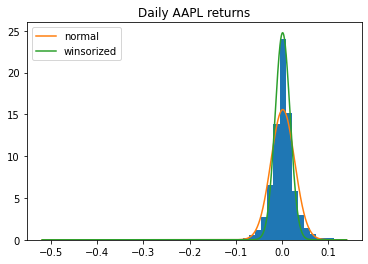

In [44]:
N = len(ret)
aapl = ret.aapl
aapl_w = aapl[:]
aapl_w = aapl_w.where(np.abs(aapl_w)<0.04)

x = np.linspace(aapl.min(), aapl.max(), N)

plt.title('Daily AAPL returns')
plt.hist(aapl, bins=50, density=True);
plt.plot(x, norm.pdf(x, aapl.mean(), aapl.std()), label='normal');
plt.plot(x, norm.pdf(x, aapl_w.mean(), aapl_w.std()), label='winsorized');
plt.legend();

##### GS

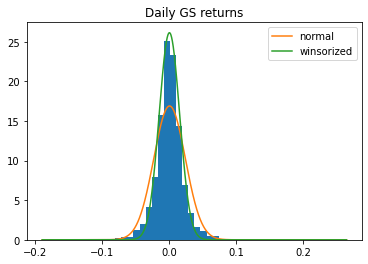

In [45]:
gs_w = gs[:]
gs_w = gs_w.where(np.abs(gs_w)<0.04)

x = np.linspace(gs.min(), gs.max(), N)

plt.title('Daily GS returns')
plt.hist(gs, bins=50, density=True);
plt.plot(x, norm.pdf(x, gs.mean(), gs.std()), label='normal');
plt.plot(x, norm.pdf(x, gs_w.mean(), gs_w.std()), label='winsorized');
plt.legend();

##### MSFT

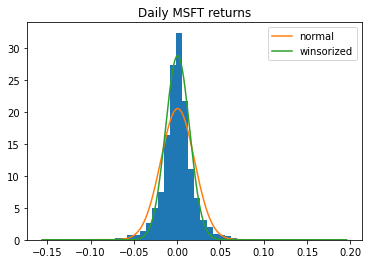

In [46]:
msft_w = msft[:]
msft_w = msft_w.where(np.abs(msft_w)<0.04)

x = np.linspace(msft.min(), msft.max(), N)

plt.title('Daily MSFT returns')
plt.hist(msft, bins=50, density=True);
plt.plot(x, norm.pdf(x, msft.mean(), msft.std()), label='normal');
plt.plot(x, norm.pdf(x, msft_w.mean(), msft_w.std()), label='winsorized');
plt.legend();

##### PG

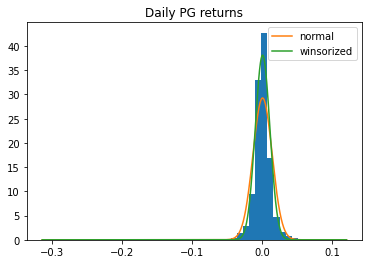

In [47]:
pg_w = pg[:]
pg_w = pg_w.where(np.abs(pg_w)<0.04)

x = np.linspace(pg.min(), pg.max(), N)

plt.title('Daily PG returns')
plt.hist(pg, bins=50, density=True);
plt.plot(x, norm.pdf(x, pg.mean(), pg.std()), label='normal');
plt.plot(x, norm.pdf(x, pg_w.mean(), pg_w.std()), label='winsorized');
plt.legend();

##### GE

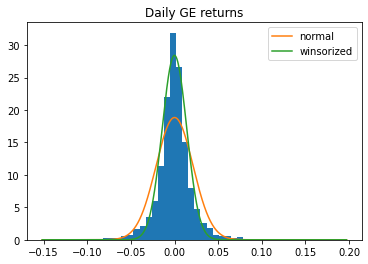

In [53]:
ge_w = ge[:]
ge_w = ge_w.where(np.abs(ge_w)<0.04)

x = np.linspace(ge.min(), ge.max(), N)

plt.title('Daily GE returns')
plt.hist(ge, bins=50, density=True);
plt.plot(x, norm.pdf(x, ge.mean(), ge.std()), label='normal');
plt.plot(x, norm.pdf(x, ge_w.mean(), ge_w.std()), label='winsorized');
plt.legend();

#### c)

In [15]:
print('95% VaR (in %):',ret.quantile(.05)*(-100),sep='\n')
print('\n99% VaR (in %):',ret.quantile(.01)*(-100),sep='\n')

95% VaR (in %):
aapl    3.762551
gs      3.371767
msft    2.869881
pg      1.775496
ge      3.134519
Name: 0.05, dtype: float64

99% VaR (in %):
aapl    6.450919
gs      6.317046
msft    5.467889
pg      3.608454
ge      6.081851
Name: 0.01, dtype: float64


In [16]:
var95 = ret.quantile(.05)
var99 = ret.quantile(.01)
k = ret.shape[1]

esf95 = [0 for i in range(k)]
esf99 = [0 for i in range(k)]
 
for i in range(k):
    sf95 = ret.iloc[:,i].where(ret.iloc[:,i]<var95[i])
    esf95[i] = np.mean(sf95)*(-100)
    sf99 = ret.iloc[:,i].where(ret.iloc[:,i]<var99[i])
    esf99[i] = np.mean(sf99)*(-100)

Esf95 = pd.DataFrame(columns=ret.columns)
Esf95.loc[0] = esf95
Esf99 = pd.DataFrame(columns=ret.columns)
Esf99.loc[0] = esf99

#Esf95.Index.rename('95')
print('95% Expected Shortfall (in %):',Esf95,sep='\n')
print('\n99% Expected Shortfall (in %):',Esf99,sep='\n')

95% Expected Shortfall (in %):
       aapl        gs      msft     pg        ge
0  5.700202  5.283197  4.504708  3.164  5.015128

99% Expected Shortfall (in %):
      aapl        gs      msft        pg        ge
0  9.50909  9.213828  7.675747  5.901506  8.440496
